In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import basic_keras as b

Using TensorFlow backend.


# Compare Learning Rates

In [3]:
plt.style.use('ggplot')

In [4]:
figsize=(20, 5)

In [5]:
def plot_lr(lr):
    m = b.TSModel(b.lstm_timesteps, b.lstm_batchsize)
    h = b.train(m, 4, lr, b.lstm_batchsize, verbose=0)
    return [x for i in range(len(h)) for x in h[i].history['loss']]
    

In [6]:
plots = {                       "1e-1": plot_lr(1e-1),
         "5e-2": plot_lr(5e-2), "1e-2": plot_lr(1e-2),
         "5e-3": plot_lr(5e-3), "1e-3": plot_lr(1e-3),
         "5e-4": plot_lr(5e-4), "1e-4": plot_lr(1e-4)}

In [7]:
npplots = {}
for k in plots.keys():
    npplots[k] = np.array(plots[k])

In [8]:
for k in npplots.keys():
    plots[k] = npplots[k].clip(max=1.0)

In [9]:
plot = pd.DataFrame(plots)

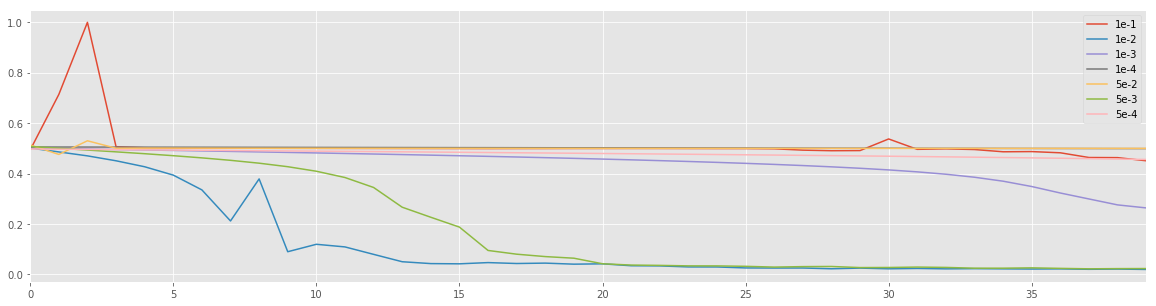

In [10]:
plot.plot(figsize=figsize)

# Load Up Trained Model

In [11]:
m = b.TSModel(b.lstm_timesteps, b.lstm_batchsize)

In [12]:
m.m.load_weights('keras_128_5e-3.h5')

# Test Some Predictions

In [13]:
from singen import SinGen

In [14]:
g = SinGen(timesteps=b.lstm_timesteps)

In [15]:
x, y = g.batch()

In [16]:
y_ = m.m.predict(x, batch_size=1)

In [17]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [18]:
plt.style.use('ggplot')

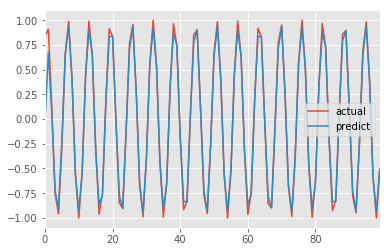

In [19]:
res.plot()

In [20]:
x, y = g.batch()
y_ = m.m.predict(x, batch_size=1)
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

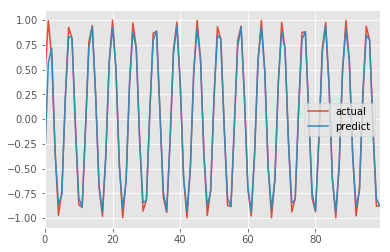

In [21]:
res.plot()

In [22]:
m.m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 64)           16896     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 1)            264       
Total params: 17,160.0
Trainable params: 17,160
Non-trainable params: 0.0
_________________________________________________________________


# See How Far It Can Run

In [23]:
figsize=(20, 5)

In [24]:
x, y = g.batch()

In [25]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [26]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m.m.predict(xs, batch_size=1)
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [27]:
fx, fy = gen_future(2)

In [28]:
pfy = pred_future(x, 2)

## Here is what this looks like:

###  Note that the blue values are all generated from the LSTM - none of these are coming from the generator

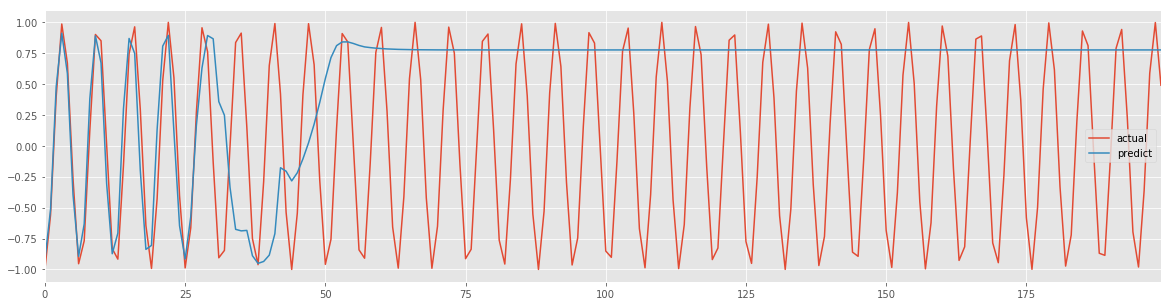

In [29]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [30]:
showpoints=10

In [31]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,-0.999756,-0.921221
1,-0.558764,-0.514098
2,0.395953,0.476551
3,0.986633,0.911400
4,0.670207,0.586935
5,-0.262404,-0.393306
6,-0.953762,-0.894123
7,-0.768235,-0.631565
8,0.123603,0.381005
9,0.901801,0.891101
